## Shell Contact Example

In [1]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.001,
                          shell_h=0.001)

material = dismech.Material(density=1200,
                            youngs_rod=0,
                            youngs_shell=2e8,
                            poisson_rod=0.5,
                            poisson_shell=0)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=25,
                                  total_time=1.0,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
#env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
env.add_force('selfContact', delta=5e-4, h=2e-3)
#env.set_static()   

geo = dismech.Geometry.from_txt('input_twoTriangleContact_p2t.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)

u = robot.state.u
u[11] = -0.5
u[14] = -0.5
u[17] = -0.5

### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [2]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace']
mask: [[ 9 10 11 12 13 14 15 16 17  3  4  5  6  7  8  0  1  2]]
contact type is: ['PointToFace

In [3]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Shell contact p2t')

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

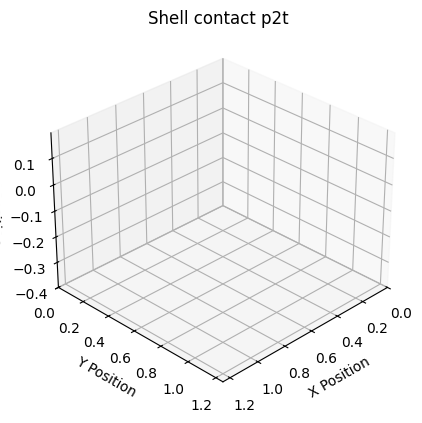

In [4]:
ani = dismech.get_animation(robot, t, qs, options)
ani.save('parallel_contact.gif')